<a href="https://colab.research.google.com/github/KoeusIss/orvp/blob/main/0x00_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
This dataset contains stock market data relevant to the practical execution of trades in the financial markets. In particular, it includes order book snapshots and executed trades. With one second resolution, it provides a uniquely fine grained look at the micro-structure of modern financial markets.
In this notebook we try to discover and investigate our datasets in order to find correlation and insights for our future processing.

In [1]:
# Connect with GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Utilities
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Constant
BASE_PATH = "/content/drive/MyDrive/DS/optiver-realized-volatility-prediction/"

### book_[train/test].parquet
 A parquet file partitioned by stock_id. Provides order book data on the most competitive buy and sell orders entered into the market. The top two levels of the book are shared. The first level of the book will be more competitive in price terms, it will then receive execution priority over the second level.

In [3]:
# Read data Only for the stock_id=0
book = pd.read_parquet(BASE_PATH + "book_train.parquet/stock_id=0")

In [9]:
# Data first look
book

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [10]:
# Data types
book.dtypes

time_id                int16
seconds_in_bucket      int16
bid_price1           float32
ask_price1           float32
bid_price2           float32
ask_price2           float32
bid_size1              int32
ask_size1              int32
bid_size2              int32
ask_size2              int32
dtype: object

We can see that all the provided features are numerical

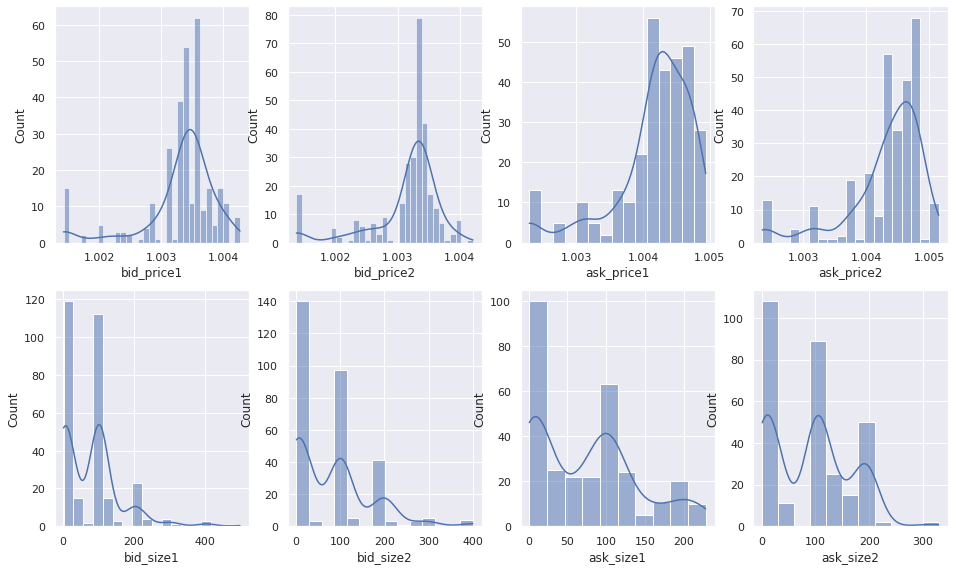

In [67]:
# Visualizing features distrbution

features_dist = [
  "bid_price1", "bid_price2", "ask_price1", "ask_price2",
  "bid_size1", "bid_size2", "ask_size1", "ask_size2"
]
sns.set(rc={"figure.figsize": (16, 20)}); np.random.seed(0)

for i, feat in enumerate(features_dist):
  plt.subplot(4, 4, i + 1)
  ax = sns.histplot(book_id_5[feat], kde=True)

plt.show()

The Data is partitioned by two main factors: first the stock_id which represent the stock_id of some studied market share, and the time_id or the bucket id. Considering the data is a time series representation, the time_id is the 10 mininute observation and time in bucket is the seconds tic inside those 10 min range.

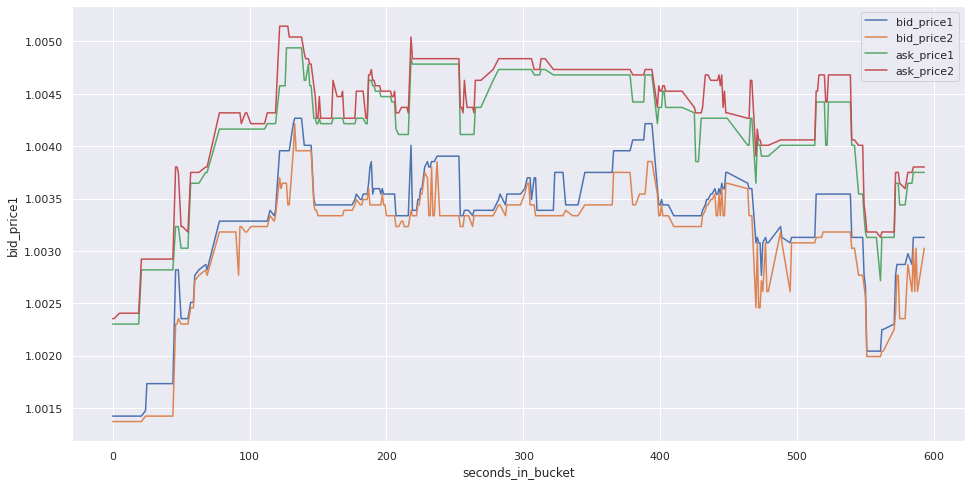

In [86]:
# Ploting
sns.set(rc={"figure.figsize": (16, 8)}); np.random.seed(0)
sns.lineplot(data=book_id_5, x="seconds_in_bucket", y="bid_price1")
sns.lineplot(data=book_id_5, x="seconds_in_bucket", y="bid_price2")
sns.lineplot(data=book_id_5, x="seconds_in_bucket", y="ask_price1")
sns.lineplot(data=book_id_5, x="seconds_in_bucket", y="ask_price2")
plt.legend(labels=["bid_price1","bid_price2", "ask_price1", "ask_price2"])
plt.show()

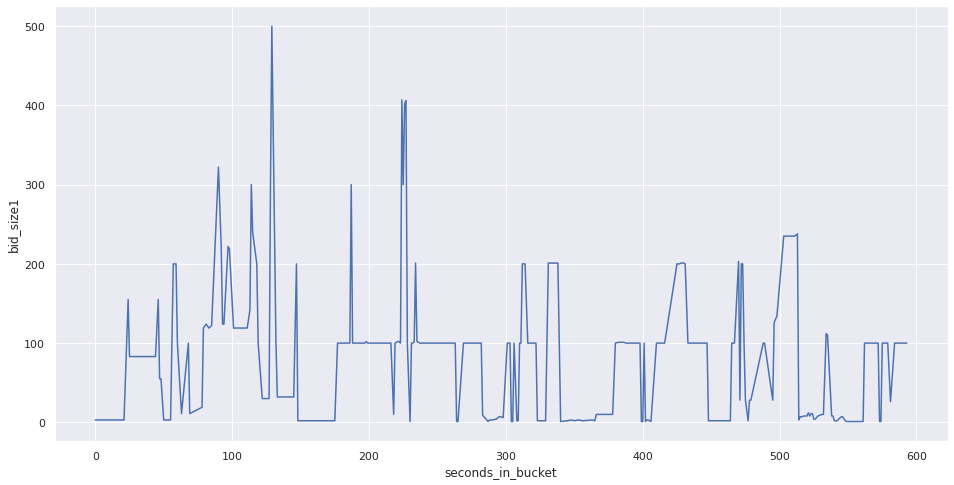

In [83]:
sns.set(rc={"figure.figsize": (16, 8)}); np.random.seed(0)
sns.lineplot(data=book_id_5, x="seconds_in_bucket", y="bid_size1")
plt.show()

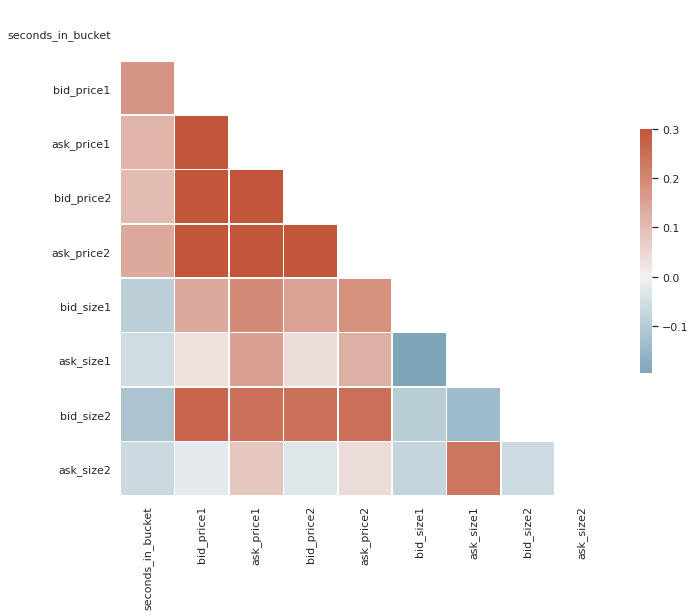

In [89]:
# Correlation
sns.set_theme(style="white")
d = book_id_5.drop(["time_id"], axis=1)

corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### trade_[train/test].parquet
A parquet file partitioned by stock_id. Contains data on trades that actually executed. Usually, in the market, there are more passive buy/sell intention updates (book updates) than actual trades, therefore one may expect this file to be more sparse than the order book.

In [90]:
# Read data Only for the stock_id=0
trade = pd.read_parquet(BASE_PATH + "trade_train.parquet/stock_id=0")

In [91]:
# Trade data
trade

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


In [93]:
trade.dtypes

time_id                int16
seconds_in_bucket      int16
price                float32
size                   int32
order_count            int16
dtype: object

In [95]:
trade_id_5 = trade[trade["time_id"] == 5]

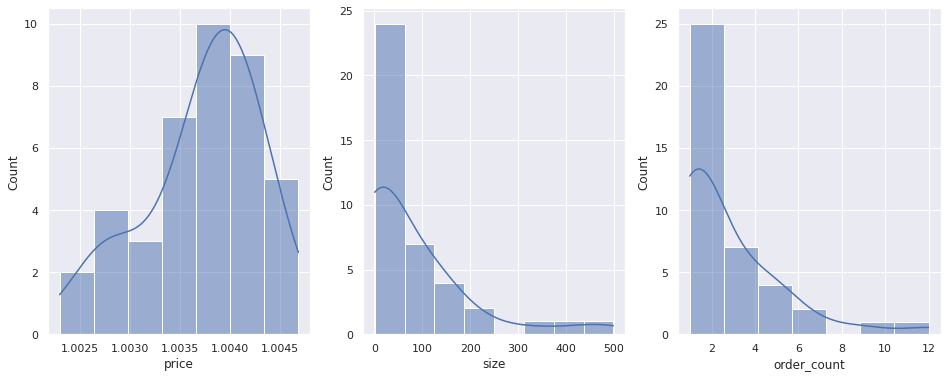

In [98]:
# Visualizing features distrbution

features_dist = [
  "price", "size", "order_count",
]
sns.set(rc={"figure.figsize": (16, 6)}); np.random.seed(0)

for i, feat in enumerate(features_dist):
  plt.subplot(1, 3, i + 1)
  ax = sns.histplot(trade_id_5[feat], kde=True)

plt.show()